In [22]:
# %%
import sys
import os
import numpy as np
import numpy.linalg
import scipy as sp  
import matplotlib.pyplot as plt

In [23]:
def HA(n, Lx, ky):
    """  This function constructs the full Hamiltonian for all A bonds on the lattice
    
        HA1 = Bonds A: (4x+3, y+1) <--> (4x+4, y),  x' = 4x+3,   x = 4x + 4 
        HA2 = Bonds A: (4x+1, y) <--> (4x+2, y),  x' = 4x+1,   x = 4x + 2
        HA = HA1 + HA2"""
        
    #creates an array with all values of the lattice sites that construct the A bonds
    #in a range of lattice sites of 4*n
    
    A = np.arange(3, 4 * n, 4)  # 4x + 3
    B = np.arange(4, 4 * n + 1, 4)  # 4x + 4
    C = np.arange(1, 4 * n, 4)  # 4x + 1
    D = np.arange(2, 4 * n + 1, 4)  # 4x + 2


    HA1 = np.zeros((Lx, Lx), dtype=complex)
    HA2 = np.zeros((Lx, Lx), dtype=complex)

    HA1[A - 1, B - 1] = np.exp(1j * ky)
    HA1[B - 1, A - 1] = np.exp(-1j * ky)
    HA2[C - 1, D - 1] = 1
    HA2[D - 1, C - 1] = 1
    HA = HA1 + HA2
    return HA


def HB(n, Lx, ky):
    """  This function constructs the full Hamiltonian for all B bonds on the lattice
    
        HB1 = Bonds B: (4x+2, y+1) <--> (4x+1, y), x' = 4x + 2,   x = 4x + 1 
        HB2 = Bonds B: (4x+3, y) <--> (4x+4, y), x' = 4x + 3,   x = 4x + 4
        HB = HB1 + HB2 """

    #creates an array with all values of the lattice sites that construct the B bonds
    #in a range of lattice sites of 4*n
    
    A = np.arange(2, 4 * n, 4)  # 4x + 2
    B = np.arange(1, 4 * n, 4)  # 4x + 1
    C = np.arange(3, 4 * n, 4)  # 4x + 3
    D = np.arange(4, 4 * n + 1, 4)  # 4x + 4

    HB1 = np.zeros((Lx, Lx), dtype=complex)
    HB2 = np.zeros((Lx, Lx), dtype=complex)

    HB1[A - 1, B - 1] = np.exp(1j * ky)
    HB1[B - 1, A - 1] = np.exp(-1j * ky)
    HB2[C - 1, D - 1] = 1
    HB2[D - 1, C - 1] = 1

    HB = HB1 + HB2

    return HB


def HC(n, Lx):
    
    """ This function constructs the full Hamiltonian for all C bonds on the lattice
    
        HC1 = Bonds C: (4x, y) <--> (4x+1, y ), x' = 4x,   x = 4x + 1
        HC2 = Bonds C: (4x+2, y) <--> (4x+3, y), x' = 4x + 2,   x = 4x + 3
        HC = HC1 + HC2  """

    #creates an array with all values of the lattice sites that construct the C bonds
    #in a range of lattice sites of 4*n
    
    A = np.arange(4, 4 * n, 4)  # 4x
    B = np.arange(5, 4 * n + 1, 4)  # 4x + 1
    C = np.arange(2, 4 * n , 4)  # 4x + 2
    D = np.arange(3, 4 * n , 4)  # 4x + 3

    HC1 = np.zeros((Lx, Lx), dtype=complex)
    HC2 = np.zeros((Lx, Lx), dtype=complex)
  
    HC1[A - 1, B - 1] = 1
    HC1[B - 1, A - 1] = 1
    HC2[C - 1, D - 1] = 1
    HC2[D - 1, C - 1] = 1

    HC = (HC1 + HC2) 

    return HC


In [24]:
def U_1(n, Lx, T, ky,noise):
    
    """ This function defines the time-evolution function U(T) """
    
    H1 = - J * HA(n, Lx, ky) - Jprime * (HB(n, Lx, ky) + HC(n, Lx))


    (E1,V1)=np.linalg.eigh(H1)


    U_m = (V1 @ np.diag(np.exp(-1j*E1*(T/3 + noise[0][2]))) @ V1.conj().T)
    #fix the loop such that the ky must be same.
    return U_m

def U_2(n, Lx, T, ky,noise):
    
    """ This function defines the time-evolution function U(T) """
    
    H2 = - J * HB(n, Lx, ky) - Jprime * (HA(n, Lx, ky) + HC(n, Lx))

    (E2,V2)=np.linalg.eigh(H2)



    U_m =  (V2 @ np.diag(np.exp(-1j*E2*(T/3 + noise[0][1]))) @ V2.conj().T) 
    #fix the loop such that the ky must be same.
    return U_m

def U_3(n, Lx, T, ky,noise):
    
    """ This function defines the time-evolution function U(T) """
    
    H3 = - J * HC(n, Lx) - Jprime * (HA(n, Lx, ky) + HB(n, Lx, ky))


    (E3,V3)=np.linalg.eigh(H3)


    U_m = (V3 @ np.diag(np.exp(-1j*E3*(T/3 + noise[0][0]))) @ V3.conj().T) 
    #fix the loop such that the ky must be same.
    return U_m


# %%
def adjoint(psi):
    return psi.conjugate().transpose()
def psi_to_rho(psi):
    return numpy.outer(psi,psi.conjugate())
def exp_val(psi, op):
    return numpy.real(numpy.dot(adjoint(psi),op.dot(psi)))
def norm_sq(psi):
    return numpy.real(numpy.dot(adjoint(psi),psi))
def normalize(psi,tol=1e-9):
    ns=norm_sq(psi)**0.5
    if ns < tol:
        raise ValueError
    return psi/ns
def is_herm(M,tol=1e-9):
    if M.shape[0]!=M.shape[1]:
        return False
    diff=M-adjoint(M)
    return max(numpy.abs(diff.flatten())) < tol
def is_unitary(M,tol=1e-9):
    if M.shape[0]!=M.shape[1]:
        return False
    diff=M.dot(adjoint(M))-numpy.identity((M.shape[0]))
    return max(numpy.abs(diff.flatten())) < tol
def eigu(U,tol=1e-9):
    (E_1,V_1)=numpy.linalg.eigh(U+adjoint(U))
    U_1=adjoint(V_1).dot(U).dot(V_1)
    H_1=adjoint(V_1).dot(U+adjoint(U)).dot(V_1)
    non_diag_lst=[]
    j=0
    while j < U_1.shape[0]:
        k=0
        while k < U_1.shape[0]:
            if j!=k and abs(U_1[j,k]) > tol:
                if j not in non_diag_lst:
                    non_diag_lst.append(j)
                if k not in non_diag_lst:
                    non_diag_lst.append(k)
            k+=1
        j+=1
    if len(non_diag_lst) > 0:
        non_diag_lst=numpy.sort(numpy.array(non_diag_lst))
        U_1_cut=U_1[non_diag_lst,:][:,non_diag_lst]
        (E_2_cut,V_2_cut)=numpy.linalg.eigh(1.j*(U_1_cut-adjoint(U_1_cut)))
        V_2=numpy.identity((U.shape[0]),dtype=V_2_cut.dtype)
        for j in range(len(non_diag_lst)):
            V_2[non_diag_lst[j],non_diag_lst]=V_2_cut[j,:]
        V_1=V_1.dot(V_2)
        U_1=adjoint(V_2).dot(U_1).dot(V_2)
    # Sort by phase
    U_1=numpy.diag(U_1)
    inds=numpy.argsort(numpy.imag(numpy.log(U_1)))
    return (U_1[inds],V_1[:,inds]) # = (U_d,V) s.t. U=V*U_d*V^\dagger


In [25]:
def U(n, Lx, T, ky,noise):
    
    """ This function defines the time-evolution function U(T) """
    
    H1 = - J * HA(n, Lx, ky) - Jprime * (HB(n, Lx, ky) + HC(n, Lx))
    H2 = - J * HB(n, Lx, ky) - Jprime * (HA(n, Lx, ky) + HC(n, Lx))
    H3 = - J * HC(n, Lx) - Jprime * (HA(n, Lx, ky) + HB(n, Lx, ky))

    (E1,V1)=np.linalg.eigh(H1)

    (E2,V2)=np.linalg.eigh(H2)

    (E3,V3)=np.linalg.eigh(H3)


    U_m = (V3 @ np.diag(np.exp(-1j*E3*(T/3 + noise[0][0]))) @ V3.conj().T) @ (V2 @ np.diag(np.exp(-1j*E2*(T/3 + noise[0][1]))) @ V2.conj().T) @ (V1 @ np.diag(np.exp(-1j*E1*(T/3 + noise[0][2]))) @ V1.conj().T)
    #fix the loop such that the ky must be same.
    return U_m

In [26]:
n =13   # Number of unit lattices 
Lx = 4*n        # Number of lattice sites along the x direction
Ly = 52        # Number of lattice sites along the y direction   
J = 1       # Hopping coefficient 
Jprime =0.10      # Number of lattice sites along the y direction
T_A  = 3*np.pi/6 
WNoiseinit = 0.0
W = WNoiseinit
omegaA = (2*np.pi)/T_A 
init_wave = np.zeros(Lx, dtype=np.complex128)
init_wave[(4*n) - 1] = 1.0  # delta at site 1500 (1‐based)

Lx = 4 * n        # Number of lattice sites along the x direction
Ly = 52
J = 1       # Hopping coefficient 
Jprime = 0.10        # Hopping coefficient 
m = 100      # Multiples of T
#noise_lst = [0.2]*96

In [27]:
T_A  = 3 * np.pi / 6         # Driving period 
t_A = np.arange(0, m * T_A, T_A)      # Multiples of driving period for 
omegaA = (2 * np.pi) / T_A 

# %%
#---------------------------- Calculating and Graphing the Quasienergy Spectrum---------------------------------#

# Momentum space to calculate the quasienergy for the anomalous and haldane 
ky_list = np.linspace(-np.pi, np.pi, 100)

In [28]:
def compute_rms_spread(prob_density, positions=None):
    """
    Compute the root mean squared (RMS) spread of a probability density.
    Returns:
    - float: Root mean squared spread.
    """
    prob_density = np.asarray(prob_density)
    assert np.isclose(np.sum(prob_density), 1.0), "Probabilities must sum to 1."

    if positions is None:
        positions = np.arange(len(prob_density))

    # Compute the expectation value of position
    mean_pos = np.sum(positions * prob_density)

    # Compute the expectation value of position squared
    mean_pos_sq = np.sum((positions**2) * prob_density)

    # RMS spread (standard deviation)
    rms_spread = np.sqrt(mean_pos_sq - mean_pos**2)

    return rms_spread


In [29]:
def propagate(W):
    W_0_21 = []
    rms_site = []
    ky_list = np.linspace(-np.pi, np.pi, 100)
    ky_index = 88  # Index for the ky value to use
    #GA = np.zeros((len(t_A), Lx, Lx), dtype=complex)
    #seed = seed_start
    #np.random.seed(seed)
    for step in range(0, len(t_A)):
        random = np.random.uniform(-W, W, (1, 3))
        if step == 0:
            final_waves = (init_wave)
            W_0_21.append(lochsgmidt_echo(final_waves, init_wave))
            normalized_final_array = np.abs(final_waves) / np.sum(np.abs(final_waves))  # Normalize the array
            rms_final_array = compute_rms_spread(normalized_final_array)
            rms_site.append(rms_final_array)
        else:
            final_waves = U_1(n, Lx, (t_A[step] - t_A[step - 1]), ky_list[ky_index], random) @ final_waves
            final_waves = U_2(n, Lx, (t_A[step] - t_A[step - 1]), ky_list[ky_index], random) @ final_waves
            final_waves = U_3(n, Lx, (t_A[step] - t_A[step - 1]), ky_list[ky_index], random) @ final_waves
            W_0_21.append(lochsgmidt_echo(final_waves, init_wave))
            normalized_final_array = np.abs(final_waves) / np.sum(np.abs(final_waves))  # Normalize the array
            rms_final_array = compute_rms_spread(normalized_final_array)
            rms_site.append(rms_final_array)
    return W_0_21, rms_site

def lochsgmidt_echo(final_vector, initial_vector):
    final_vector = final_vector / ((np.linalg.norm(final_vector)))
    initial_vector = initial_vector / ((np.linalg.norm(initial_vector)))
    rate = np.conjugate(final_vector) @ initial_vector
    return np.abs(rate)

noise_index = 12
seed_start = noise_index * 1000
W_0_21, rms_site = propagate(W)
ky_index = 88

np.savetxt(f"LE_Hal_edge_state_750_500_k_site_{ky_index}.txt", W_0_21)
np.savetxt(f"RMS_Hal_edge_state_750_500_k_site_{ky_index}.txt", rms_site)


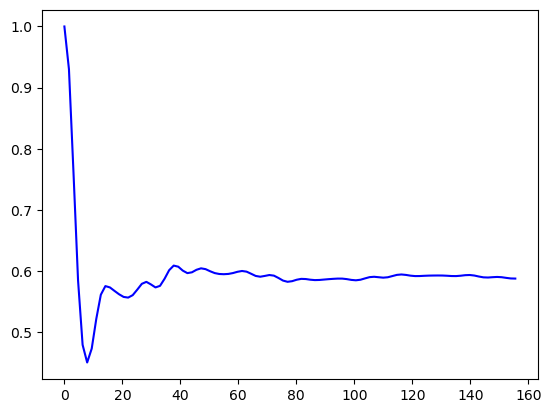

In [30]:
plt.plot(t_A, W_0_21, label=f'Noise {noise_index}', color='blue')

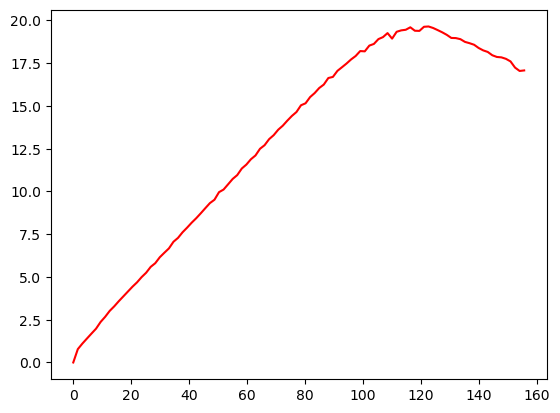

In [10]:
plt.plot(t_A, rms_site, label=f'RMS Spread {noise_index}', color='red')

<>:254: SyntaxWarning: invalid escape sequence '\p'
<>:256: SyntaxWarning: invalid escape sequence '\e'
<>:263: SyntaxWarning: invalid escape sequence '\p'
<>:265: SyntaxWarning: invalid escape sequence '\e'
<>:277: SyntaxWarning: invalid escape sequence '\p'
<>:292: SyntaxWarning: invalid escape sequence '\p'
<>:254: SyntaxWarning: invalid escape sequence '\p'
<>:256: SyntaxWarning: invalid escape sequence '\e'
<>:263: SyntaxWarning: invalid escape sequence '\p'
<>:265: SyntaxWarning: invalid escape sequence '\e'
<>:277: SyntaxWarning: invalid escape sequence '\p'
<>:292: SyntaxWarning: invalid escape sequence '\p'
/var/folders/4n/4y_rknps05l_pvrvh_0c3x540000gn/T/ipykernel_48840/3118623265.py:254: SyntaxWarning: invalid escape sequence '\p'
  plt.title(label = 'Quasienergy Spectrum, Anomalous, T = ${3 \pi}/{2}$ ' )
/var/folders/4n/4y_rknps05l_pvrvh_0c3x540000gn/T/ipykernel_48840/3118623265.py:256: SyntaxWarning: invalid escape sequence '\e'
  plt.ylabel('quasienergy, $\epsilon$ (1/$\o

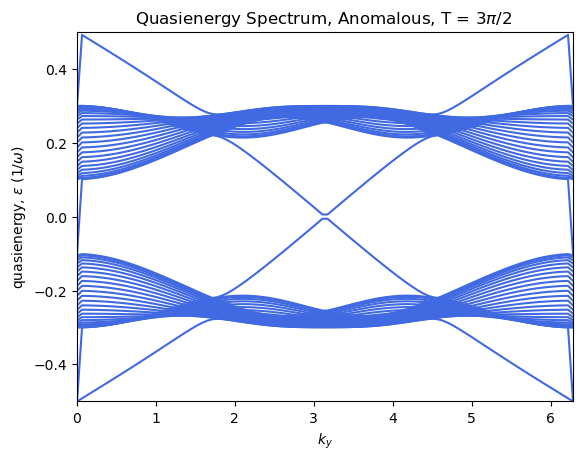

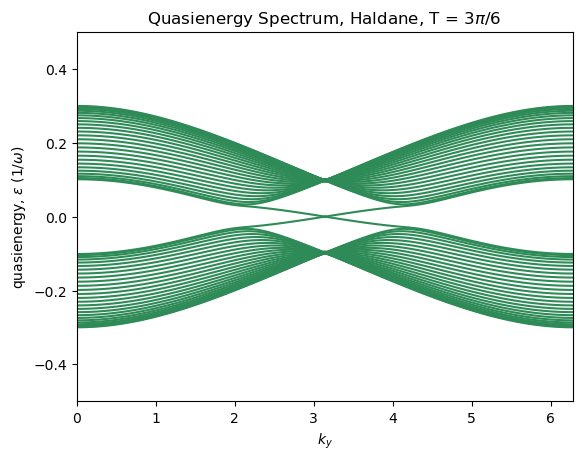

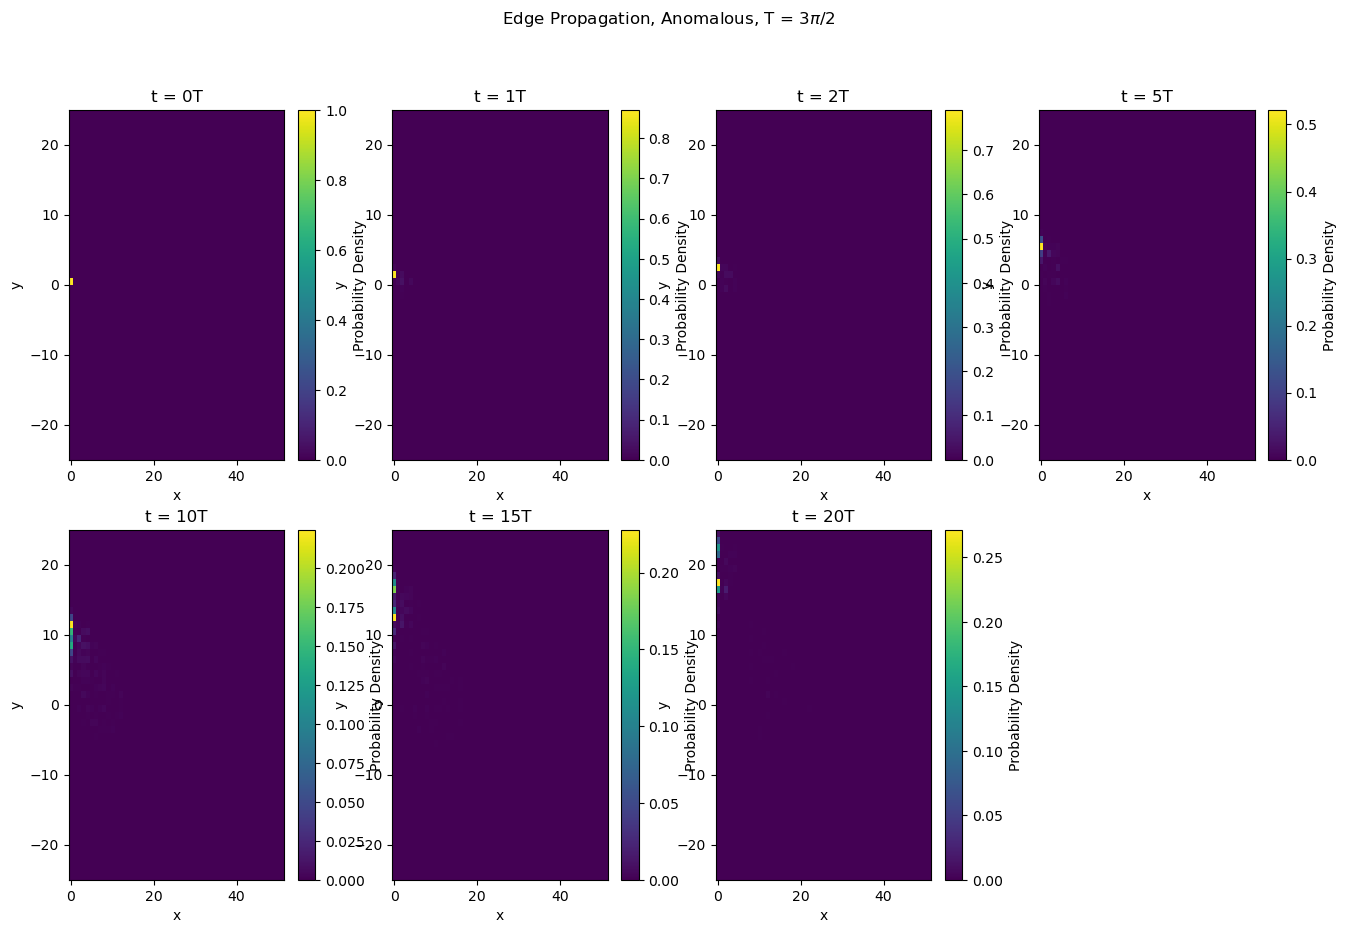

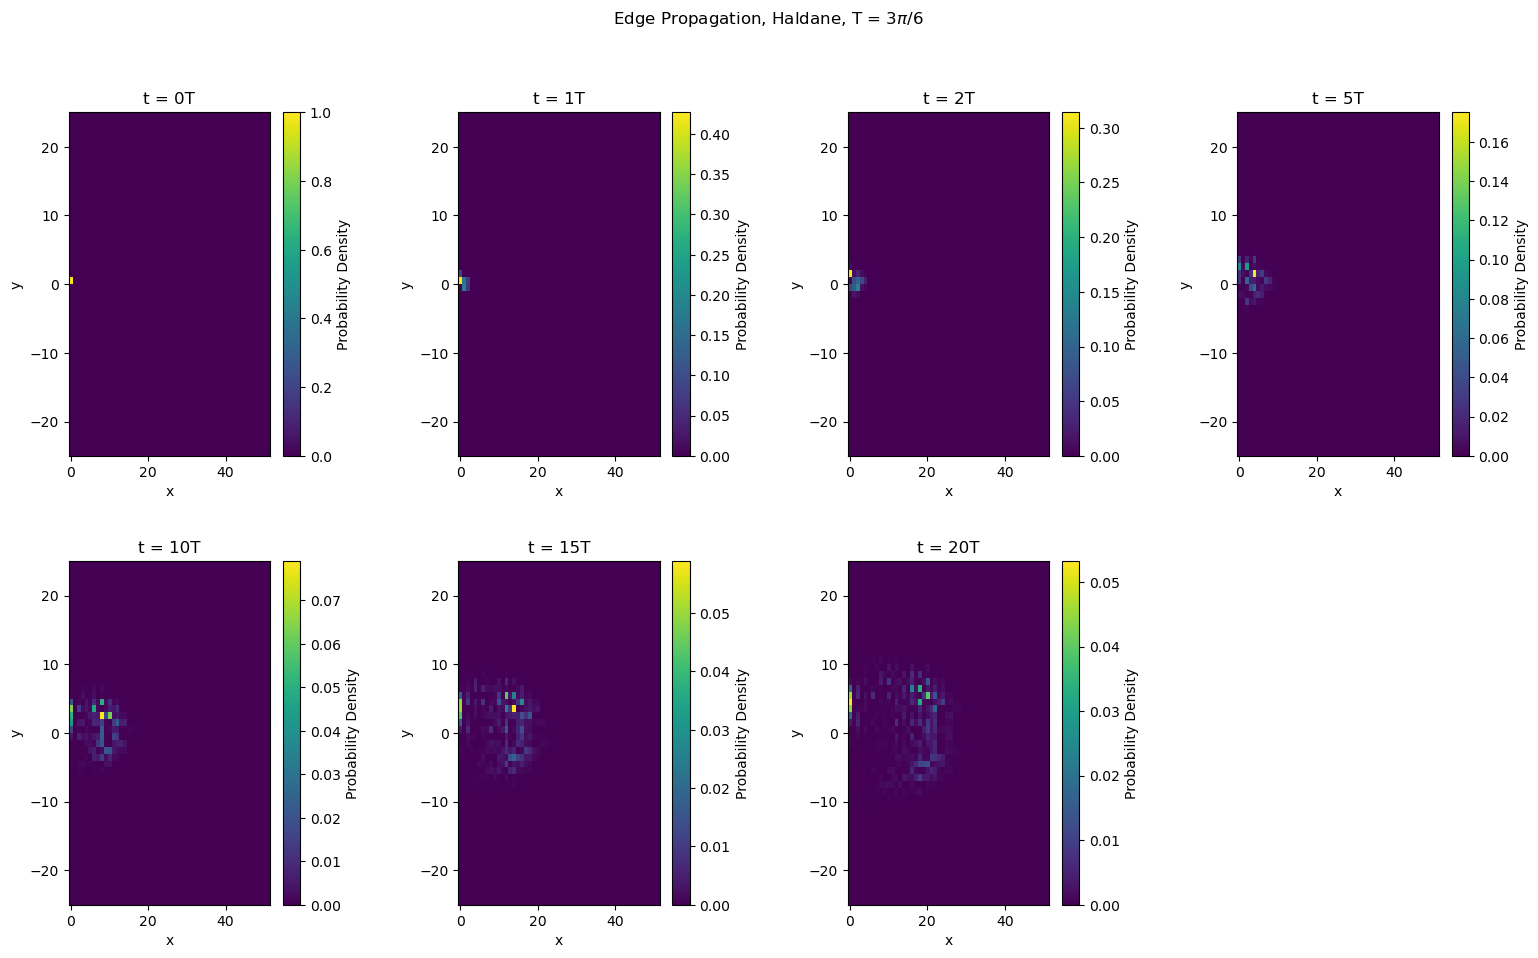

In [3]:
import numpy as np 
import numpy.linalg
import matplotlib.pyplot as plt 

def HA(n, Lx, ky):
    """  This function constructs the full Hamiltonian for all A bonds on the lattice
    
        HA1 = Bonds A: (4x+3, y+1) <--> (4x+4, y),  x' = 4x+3,   x = 4x + 4 
        HA2 = Bonds A: (4x+1, y) <--> (4x+2, y),  x' = 4x+1,   x = 4x + 2
        HA = HA1 + HA2"""
        
    #creates an array with all values of the lattice sites that construct the A bonds
    #in a range of lattice sites of 4*n
    
    A = np.arange(3, 4 * n, 4)  # 4x + 3
    B = np.arange(4, 4 * n + 1, 4)  # 4x + 4
    C = np.arange(1, 4 * n, 4)  # 4x + 1
    D = np.arange(2, 4 * n + 1, 4)  # 4x + 2


    HA1 = np.zeros((Lx, Lx), dtype=complex)
    HA2 = np.zeros((Lx, Lx), dtype=complex)

    HA1[A - 1, B - 1] = np.exp(1j * ky)
    HA1[B - 1, A - 1] = np.exp(-1j * ky)
    HA2[C - 1, D - 1] = 1
    HA2[D - 1, C - 1] = 1
    HA = HA1 + HA2
    return HA

def HB(n, Lx, ky):
    """  This function constructs the full Hamiltonian for all B bonds on the lattice
    
        HB1 = Bonds B: (4x+2, y+1) <--> (4x+1, y), x' = 4x + 2,   x = 4x + 1 
        HB2 = Bonds B: (4x+3, y) <--> (4x+4, y), x' = 4x + 3,   x = 4x + 4
        HB = HB1 + HB2 """

    #creates an array with all values of the lattice sites that construct the B bonds
    #in a range of lattice sites of 4*n
    
    A = np.arange(2, 4 * n, 4)  # 4x + 2
    B = np.arange(1, 4 * n, 4)  # 4x + 1
    C = np.arange(3, 4 * n, 4)  # 4x + 3
    D = np.arange(4, 4 * n + 1, 4)  # 4x + 4

    HB1 = np.zeros((Lx, Lx), dtype=complex)
    HB2 = np.zeros((Lx, Lx), dtype=complex)

    HB1[A - 1, B - 1] = np.exp(1j * ky)
    HB1[B - 1, A - 1] = np.exp(-1j * ky)
    HB2[C - 1, D - 1] = 1
    HB2[D - 1, C - 1] = 1

    HB = HB1 + HB2

    return HB

def HC(n, Lx):
    
    """ This function constructs the full Hamiltonian for all C bonds on the lattice
    
        HC1 = Bonds C: (4x, y) <--> (4x+1, y ), x' = 4x,   x = 4x + 1
        HC2 = Bonds C: (4x+2, y) <--> (4x+3, y), x' = 4x + 2,   x = 4x + 3
        HC = HC1 + HC2  """

    #creates an array with all values of the lattice sites that construct the C bonds
    #in a range of lattice sites of 4*n
    
    A = np.arange(4, 4 * n, 4)  # 4x
    B = np.arange(5, 4 * n + 1, 4)  # 4x + 1
    C = np.arange(2, 4 * n , 4)  # 4x + 2
    D = np.arange(3, 4 * n , 4)  # 4x + 3

    HC1 = np.zeros((Lx, Lx), dtype=complex)
    HC2 = np.zeros((Lx, Lx), dtype=complex)
  
    HC1[A - 1, B - 1] = 1
    HC1[B - 1, A - 1] = 1
    HC2[C - 1, D - 1] = 1
    HC2[D - 1, C - 1] = 1

    HC = (HC1 + HC2) 

    return HC

#-----------------------------------------------------------------------------------
#code provided by Kolodrubetz and it is utilized to diagonalize the matrix  for function U(n, Lx, T, ky) and can be called by utilizing eigu(arg)

def adjoint(psi):
    return psi.conjugate().transpose()
def psi_to_rho(psi):
    return numpy.outer(psi,psi.conjugate())
def exp_val(psi, op):
    return numpy.real(numpy.dot(adjoint(psi),op.dot(psi)))
def norm_sq(psi):
    return numpy.real(numpy.dot(adjoint(psi),psi))
def normalize(psi,tol=1e-9):
    ns=norm_sq(psi)**0.5
    if ns < tol:
        raise ValueError
    return psi/ns
def is_herm(M,tol=1e-9):
    if M.shape[0]!=M.shape[1]:
        return False
    diff=M-adjoint(M)
    return max(numpy.abs(diff.flatten())) < tol
def is_unitary(M,tol=1e-9):
    if M.shape[0]!=M.shape[1]:
        return False
    diff=M.dot(adjoint(M))-numpy.identity((M.shape[0]))
    return max(numpy.abs(diff.flatten())) < tol
def eigu(U,tol=1e-9):
    (E_1,V_1)=numpy.linalg.eigh(U+adjoint(U))
    U_1=adjoint(V_1).dot(U).dot(V_1)
    H_1=adjoint(V_1).dot(U+adjoint(U)).dot(V_1)
    non_diag_lst=[]
    j=0
    while j < U_1.shape[0]:
        k=0
        while k < U_1.shape[0]:
            if j!=k and abs(U_1[j,k]) > tol:
                if j not in non_diag_lst:
                    non_diag_lst.append(j)
                if k not in non_diag_lst:
                    non_diag_lst.append(k)
            k+=1
        j+=1
    if len(non_diag_lst) > 0:
        non_diag_lst=numpy.sort(numpy.array(non_diag_lst))
        U_1_cut=U_1[non_diag_lst,:][:,non_diag_lst]
        (E_2_cut,V_2_cut)=numpy.linalg.eigh(1.j*(U_1_cut-adjoint(U_1_cut)))
        V_2=numpy.identity((U.shape[0]),dtype=V_2_cut.dtype)
        for j in range(len(non_diag_lst)):
            V_2[non_diag_lst[j],non_diag_lst]=V_2_cut[j,:]
        V_1=V_1.dot(V_2)
        U_1=adjoint(V_2).dot(U_1).dot(V_2)
    # Sort by phase
    U_1=numpy.diag(U_1)
    inds=numpy.argsort(numpy.imag(numpy.log(U_1)))
    return (U_1[inds],V_1[:,inds]) # = (U_d,V) s.t. U=V*U_d*V^\dagger

#-----------------------------------------------------------------------------------------------------------

def U(n, Lx, T, ky):
    
    """ This function defines the time-evolution function U(T) """
    
    H1 = - J * HA(n, Lx, ky) - Jprime * (HB(n, Lx, ky) + HC(n, Lx))
    H2 = - J * HB(n, Lx, ky) - Jprime * (HA(n, Lx, ky) + HC(n, Lx))
    H3 = - J * HC(n, Lx) - Jprime * (HA(n, Lx, ky) + HB(n, Lx, ky))

    (E1,V1)=np.linalg.eigh(H1)

    (E2,V2)=np.linalg.eigh(H2)

    (E3,V3)=np.linalg.eigh(H3)


    U_m = (V3 @ np.diag(np.exp(-1j*E3*T/3)) @ V3.conj().T) @ (V2 @ np.diag(np.exp(-1j*E2*T/3)) @ V2.conj().T) @ (V1 @ np.diag(np.exp(-1j*E1*T/3)) @ V1.conj().T)
    
    return U_m

#----------------------------------------------- Variables --------------------------------------------#

#Global variables
n =13   # Number of unit lattices 
Lx = 4*n        # Number of lattice sites along the x direction
Ly = 50 # Number of lattice sites along the y direction
J = 1       # Hopping coefficient 
Jprime =0.10        # Hopping coefficent 
m = 22      # Multiples of T

# Variables for anomalous 
T_A  = 3*np.pi/2         # Driving period 
t_A = np.arange(0 ,m*T_A, T_A)      # Mutlples of driving period for 
omegaA = (2*np.pi)/T_A 

# Variables for haldane
T_H = 3*np.pi/6         # Driving period 
t_H = np.arange(0 ,m*T_H, T_H)         # Mutlples of driving period
omegaH = (2*np.pi)/T_H

#---------------------------- Calculating and Graphing the Quasienergy Spectrum---------------------------------#

# Momentum space to calculate the quasienergy for the anomalous and haldane 
ky_list = np.linspace(0, 2*np.pi, 100)

# Lists which will hold the values for the anomalous phase during the loop
quasienergies_listA  = [] 
eigenfunctions_listA= []

# Lists which will hold the values for the Haldane phase during the loop
quasienergies_listH  = [] 
eigenfunctions_listH= []

# Calculates the quasienergy for period T with values ky 
for ky in ky_list:
    # Anomalous 
    lamdaA, V = eigu(U(n,Lx,T_A,ky))
    quasienergies_listA.append(-np.log(lamdaA)*(-1j/T_A))
    eigenfunctions_listA.append(V)
    
    #Haldane
    lamdaH, V = eigu(U(n,Lx,T_H,ky))
    quasienergies_listH.append(-np.log(lamdaH)*(-1j/T_H))
    eigenfunctions_listH.append(V)

# Anomalous
quasienergiesA = np.asanyarray(quasienergies_listA)
eigenfunctionsA = np.asanyarray(eigenfunctions_listA)

#Haldane
quasienergiesH = np.asanyarray(quasienergies_listH)
eigenfunctionsH = np.asanyarray(eigenfunctions_listH)

#-------------------------------------------- Time Evolution to Visualize Particle Edge Motion ------------------------------------------#

# Creates the matrices that will hold the values of (t, y, x, x_0) for anomalous and haldane at every point within t_A and t_H
GA = np.zeros((len(t_A),Ly, Lx, Lx), dtype = complex)
GH = np.zeros((len(t_H),Ly, Lx, Lx), dtype = complex)

# The loop below simulates time evolution
for ny in range(Ly):
    ky = (2 * np.pi * (ny))/ Ly
    
    # Calculates the eigenenergies for anomalous phase
    lamdaA, VA = eigu(U(n, Lx, T_A, ky))
    EA = -np.log(lamdaA)*(-1j/T_A) 
    
    # Calculates the eigenenergies for haldane phase
    lamdaH, VH = eigu(U(n, Lx, T_H, ky))
    EH = -np.log(lamdaH)*(-1j/T_H)
      
      # Loop below appends GA and GH with their respective time evolution calculations at values within t            
    for step in range(0, len(t_A)):
        GA[step,ny,:,:] = VA @ (np.diag(np.exp(-1j * EA * t_A[step])) @ VA.conj().T)
        
    for step in range(0, len(t_H)):
        GH[step,ny,:,:] = VH @ (np.diag(np.exp(-1j * EH * t_H[step])) @ VH.conj().T)
        
# Calculates the probability density for particle propogation in anomalous phase      
GprimeA= (np.fft.ifft(GA, axis = 1 ))
probA = np.abs(GprimeA[:,:,:,0])**2

# Calculates the probability density for particle propogation in haldane phase      
GprimeH= (np.fft.ifft(GH, axis = 1 ))
probH = np.abs(GprimeH[:,:,:,0])**2        

#--------------------------------- Plots and Graphs ------------------------------------------#

# Plots the graph quasienergy vs ky at total period T for the anomalous phase
plt.figure()
plt.plot(ky_list,quasienergiesA/omegaA,  color = 'royalblue')
plt.title(label = 'Quasienergy Spectrum, Anomalous, T = ${3 \pi}/{2}$ ' )
plt.xlabel('$k_y$')
plt.ylabel('quasienergy, $\epsilon$ (1/$\omega$)')
plt.ylim(-0.5,0.5)
plt.xlim(0,2*np.pi)

# Plots the graph quasienergy vs ky at total period T for the Haldane phase
plt.figure()
plt.plot(ky_list,quasienergiesH/omegaH,  color = 'seagreen')
plt.title(label = 'Quasienergy Spectrum, Haldane, T = ${3 \pi}/{6}$ ' )
plt.xlabel('$k_y$')
plt.ylabel('quasienergy, $\epsilon$ (1/$\omega$)')
plt.ylim(-0.5,0.5)
plt.xlim(0,2*np.pi)

# Titles for each plot in particle propagation
multi = np.arange(0,m+1)

# Indices for the plots to be shown
plot = [0, 1, 2, 5, 10,15, 20]

# Graphs probability density of the particle location at various t for anomalous phase
fig = plt.figure(3, figsize = (16,10))
plt.suptitle("Edge Propagation, Anomalous, T = $3\pi/2$")
c = 1

for n in plot:
    plt.subplot(2,4,c)
    prob_centered = np.roll(probA[n, :, :], -Ly // 2, axis=0)
    plt.imshow(prob_centered, origin='lower', aspect='auto', extent=[-0.5, Lx - 0.5, -Ly / 2, Ly / 2])
    plt.colorbar(label='Probability Density')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f't = {multi[n]}T')
    c = c + 1

# Graphs probability density of the particle location at various t for haldane phase
fig = plt.figure(5, figsize = (16,10))
plt.suptitle("Edge Propagation, Haldane, T = $3\pi/6$")
c = 1
for n in plot:
    plt.subplot(2,4,c)
    prob_centered = np.roll(probH[n, :, :], -Ly // 2, axis=0)
    plt.imshow(prob_centered, origin='lower', aspect='auto', extent=[-0.5, Lx - 0.5, -Ly / 2, Ly / 2])
    plt.colorbar(label='Probability Density')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f't = {multi[n]}T')
    c = c + 1

fig.tight_layout(pad = 3.0)
plt.show()